<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Самые-популярные-марки-стали-в-наборе-данных" data-toc-modified-id="Самые-популярные-марки-стали-в-наборе-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Самые популярные марки стали в наборе данных</a></span></li><li><span><a href="#Пропуски-нолевые-значения" data-toc-modified-id="Пропуски-нолевые-значения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Пропуски нолевые значения</a></span></li><li><span><a href="#Дисперсия" data-toc-modified-id="Дисперсия-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Дисперсия</a></span></li><li><span><a href="#Выбросы-в-данных" data-toc-modified-id="Выбросы-в-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Выбросы в данных</a></span></li></ul></li><li><span><a href="#Predict" data-toc-modified-id="Predict-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Predict</a></span></li></ul></div>

In [89]:
import pandas as pd
import numpy as np
import re
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [90]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# Полезные ссылки

[Detailed exploratory data analysis with python](https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python)  [Tuatini GODARD](https://www.kaggle.com/ekami66)

In [91]:
df_in = pd.read_csv('../data/input/Исходные данные.csv', 
            encoding = 'utf-8', 
            index_col = 0,
            sep = ';')
df_in.head()

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),N2 (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,расход газ N2,расход C пров.,сыпуч известь РП,сыпуч кварцит,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь (сух.),сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeMo,ферспл FeSi-75,ферспл FeV азот.,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл Ni H1 пласт.,ферспл SiMn18,ферспл ферванит,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,г6837?3<87?,2070-06-21 00:14:00,Э76ХФ,Р65,"29,0","45,3666667","24,4","41,0333333",NaN,"0,45646","0,059572","0,117446","0,104762","0,0409383","1557,0","1580,0","13,6067425",NaN,"12809,0163934","115,5","1,0","1,0","1,0","18,611",NaN,NaN,NaN,NaN,"0,17",NaN,"0,401","0,123","0,02",NaN,NaN,NaN,"0,051939","0,112",NaN,"0,182",NaN,"0,106","5209,0","0,002","0,389","0,368","0,127","0,682","0,01","0,011","0,086","0,009","0,023","0,459","0,002","0,002","0,003","0,756","0,0001","0,417","0,126","0,779","0,009","0,012","0,086","0,011","0,018","0,559","0,003","0,037",NaN,"63,7","1,1","3,7","0,12","2,6",NaN,NaN,"53,4","1,0","5,8","0,15","2,6",NaN
1,г683863<886,2070-06-21 01:07:00,Э76ХФ,Р65,"26,0","44,0666667","13,8666667","44,0666667",NaN,"0,359285","0,083738","0,160923","0,110327","0,0400831","1601,0","1591,0","8,074721",NaN,"12816,3461538","111,6","1,0","1,0","1,0","11,659",NaN,NaN,NaN,NaN,"0,488",NaN,NaN,"0,094","0,02",NaN,NaN,NaN,"0,050854","0,102",NaN,"0,251",NaN,"0,149","2962,0","0,002","0,465","0,345","0,112","0,643","0,009","0,011","0,08","0,007","0,023","0,461","0,002","0,002","0,003","0,774","0,0003","0,416","0,109","0,767","0,008","0,013","0,079","0,008","0,021","0,543","0,003","0,038",NaN,"58,5","0,8","4,9","0,14","2,2",NaN,NaN,"59,3","0,6","4,1","0,11","2,3",NaN
2,г683863<887,2070-06-21 02:00:00,Э76ХФ,Р65,"24,0","43,35","17,95","43,35",NaN,"0,331665","0,08149","0,132332","0,13986","0,0416225","1593,0","1586,0","13,801968",NaN,"12511,4206128","115,8","1,0","1,0","1,0","19,871",NaN,NaN,NaN,NaN,"0,05",NaN,"0,346","0,061","0,02",NaN,NaN,NaN,"0,052807","0,16",NaN,"0,204",NaN,"0,145","3743,0","0,002","0,513","0,351","0,107","0,674","0,007","0,011","0,078","0,008","0,019","0,455","0,002","0,002","0,004","0,77","0,0009","0,417","0,108","0,788","0,006","0,012","0,078","0,008","0,013","0,568","0,003","0,038",NaN,"58,0","0,8","8,6","0,12","2,6",NaN,NaN,"57,2","0,5","8,1","0,13","2,3",NaN
3,г683863<888,2070-06-21 02:58:00,Э76ХФ,Р65,"17,0","46,1833333","19,8166667","46,1833333",NaN,"0,377945","0,133194","0,221605","0,165186","0,0420497","1589,0","1589,0","12,6649585",NaN,"12998,1497056","116,3","1,0","1,0","1,0","19,497",NaN,NaN,"0,077",NaN,"0,05",NaN,"0,39","0,059","0,02",NaN,NaN,NaN,"0,053349","0,161",NaN,"0,345",NaN,"0,237","4293,0","0,002","0,487","0,31","0,105","0,611","0,009","0,011","0,07","0,006","0,02","0,434","0,001","0,001","0,003","0,767","0,0002","0,419","0,103","0,795","0,008","0,013","0,07","0,007","0,014","0,571",

# Задача

EDA
выводы по качеству данных:
1. Пропуски
2. Нули
3. Дисперсия
4. Выбросы

Создать модель предсказания для столбцов:

* химшлак последний Al2O3
* химшлак последний CaO
* химшлак последний R
* химшлак последний SiO2

## EDA

### Самые популярные марки стали в наборе данных


Самая популярная марка стали: Э76ХФ


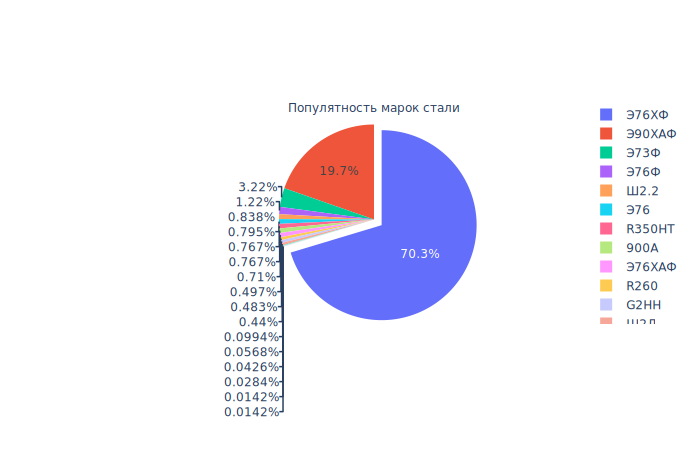

In [92]:
mat_counts = df_in.МАРКА.value_counts()
print(f"Самая популярная марка стали: {mat_counts.index[0]}")
labels = mat_counts.index
values = mat_counts.values
pull = np.zeros(shape=(values.shape[0]))
pull[values.argmax()] = 0.1
pull
fig = go.Figure(data=[go.Pie(labels=labels, 
                             values=values,
                             pull =pull,
                             title = 'Популятность марок стали')])
fig.write_image("images/Популярные марки стали.svg", format = 'svg', engine = 'kaleido')
fig.show(renderer = 'svg')

### Пропуски нолевые значения

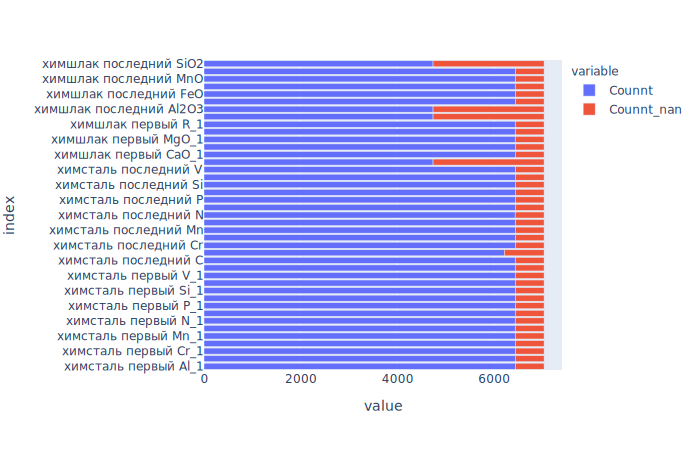

In [93]:
df_him = df_in[[column for column in df_in.columns if re.search('последний|первый', 
                                                                  column.lower())]]
df_skips = pd.DataFrame({'Counnt' : df_him.count().sort_index()})
df_skips['Counnt_nan'] = df_him.shape[0] - df_skips.Counnt
df_skips
fig = px.bar(df_skips,  orientation='h', )
fig.write_image("images/Пропуски в фим составе.svg", format = 'svg', engine = 'kaleido')
fig.show(renderer = 'svg')

### Дисперсия

In [94]:
# Строковые данные
str_dada_col = ['nplv', 'DT', 'МАРКА', 'ПРОФИЛЬ']
columns = df_in.columns.values
columns_float = columns[np.isin(columns, str_dada_col, invert=True)]

In [186]:
# Замена , на . в данных которые необходмо привести к flot
# Приведение данных к float16
# Замена nan на 0
df_disp = df_in
df_disp[columns_float] =  df_disp[columns_float] \
                      .replace(',', '.', regex=True) \
                      .astype('float16')
df[columns_float] = df_disp[columns_float]
df_disp.head()

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),N2 (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,расход газ N2,расход C пров.,сыпуч известь РП,сыпуч кварцит,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь (сух.),сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeMo,ферспл FeSi-75,ферспл FeV азот.,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл Ni H1 пласт.,ферспл SiMn18,ферспл ферванит,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,г6837?3<87?,2070-06-21 00:14:00,Э76ХФ,Р65,29.0,45.37500,24.406250,41.03125,NaN,0.456543,0.059570,0.117432,0.104736,0.040924,1557.0,1580.0,13.609375,NaN,12808.0,115.5000,1.0,1.0,1.0,18.609375,NaN,NaN,NaN,NaN,0.170044,NaN,0.400879,0.122986,0.020004,NaN,NaN,NaN,0.051941,0.112000,NaN,0.182007,NaN,0.106018,5208.0,0.002001,0.388916,0.367920,0.126953,0.682129,0.010002,0.011002,0.085999,0.009003,0.022995,0.458984,0.002001,0.002001,0.003000,0.755859,0.0001,0.416992,0.125977,0.778809,0.009003,0.012001,0.085999,0.011002,0.018005,0.559082,0.003,0.036987,NaN,63.68750,1.099609,3.699219,0.119995,2.599609,NaN,NaN,53.40625,1.000000,5.800781,0.150024,2.599609,NaN
1,г683863<886,2070-06-21 01:07:00,Э76ХФ,Р65,26.0,44.06250,13.867188,44.06250,NaN,0.359375,0.083740,0.160889,0.110352,0.040070,1601.0,1591.0,8.078125,NaN,12816.0,111.6250,1.0,1.0,1.0,11.656250,NaN,NaN,NaN,NaN,0.488037,NaN,NaN,0.093994,0.020004,NaN,NaN,NaN,0.050842,0.101990,NaN,0.250977,NaN,0.149048,2962.0,0.002001,0.465088,0.344971,0.112000,0.643066,0.009003,0.011002,0.080017,0.007000,0.022995,0.460938,0.002001,0.002001,0.003000,0.773926,0.0003,0.416016,0.109009,0.767090,0.008003,0.013000,0.078979,0.008003,0.020996,0.542969,0.003,0.037994,NaN,58.50000,0.799805,4.898438,0.140015,2.199219,NaN,NaN,59.31250,0.600098,4.101562,0.109985,2.300781,NaN
2,г683863<887,2070-06-21 02:00:00,Э76ХФ,Р65,24.0,43.34375,17.953125,43.34375,NaN,0.331543,0.081482,0.132324,0.139893,0.041626,1593.0,1586.0,13.804688,NaN,12512.0,115.8125,1.0,1.0,1.0,19.875000,NaN,NaN,NaN,NaN,0.049988,NaN,0.345947,0.061005,0.020004,NaN,NaN,NaN,0.052795,0.160034,NaN,0.203979,NaN,0.145020,3744.0,0.002001,0.513184,0.351074,0.106995,0.673828,0.007000,0.011002,0.078003,0.008003,0.018997,0.455078,0.002001,0.002001,0.004002,0.770020,0.0009,0.416992,0.107971,0.788086,0.006001,0.012001,0.078003,0.008003,0.013000,0.567871,0.003,0.037994,NaN,58.00000,0.799805,8.601562,0.119995,2.599609,NaN,NaN,57.18750,0.500000,8.101562,0.130005,2.300781,NaN
3,г683863<888,2070-06-21 02:58:00,Э76ХФ,Р65,17.0,46.18750,19.812500,46.18750,NaN,0.377930,0.133179,0.221558,0.165161,0.042053,1589.0,1589.0,12.664062,NaN,13000.0,116.3125,1.0,1.0,1.0,19.500000,NaN,NaN,0.077026,NaN,0.049988,NaN,0.389893,0.058990,0.020004,NaN,NaN,NaN,0.053345,0.161011,NaN,0.344971,NaN,0.237061,4292.0,0.002001,0.487061,0.310059,0.104980,0.610840,0.009003,0.011002,0.070007,0.006001,0.020004,0.434082,0.001000,0.001000,0.003000,0.767090,0.0002,0.418945,0.103027,0.794922,0.008003,

### Выбросы в данных

Данные по колонке: t вып-обр
Заполненны на 91.52%


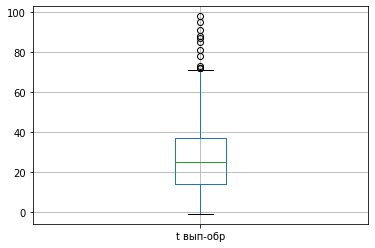

Данные по колонке: t обработка
Заполненны на 91.46%


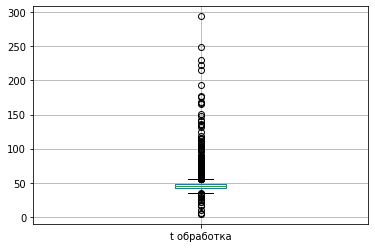

Данные по колонке: t под током
Заполненны на 91.46%


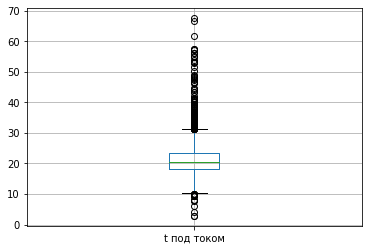

Данные по колонке: t продувка
Заполненны на 91.52%


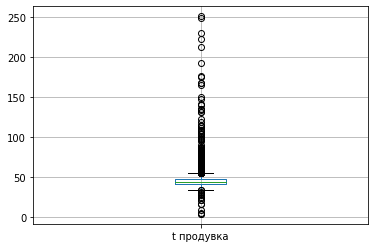

Данные по колонке: ПСН гр.
Заполненны на 74.55%


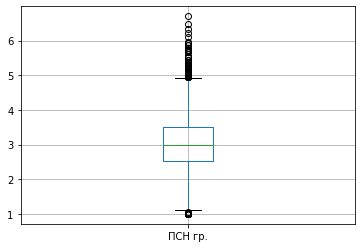

Данные по колонке: чист расход C
Заполненны на 91.39%


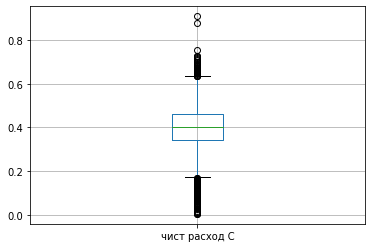

Данные по колонке: чист расход Cr
Заполненны на 83.55%


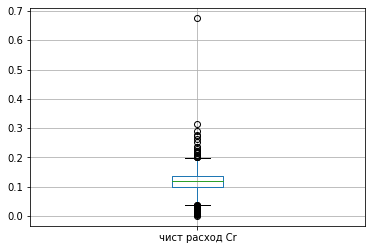

Данные по колонке: чист расход Mn
Заполненны на 91.34%


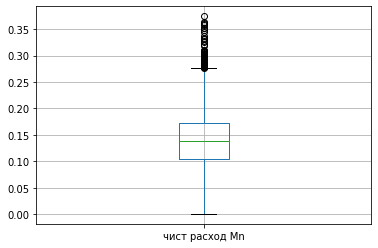

Данные по колонке: чист расход Si
Заполненны на 91.34%


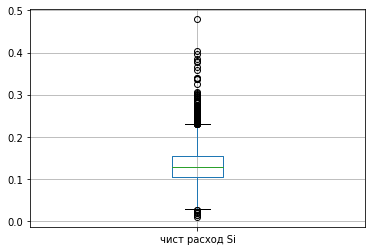

Данные по колонке: чист расход V
Заполненны на 87.74%


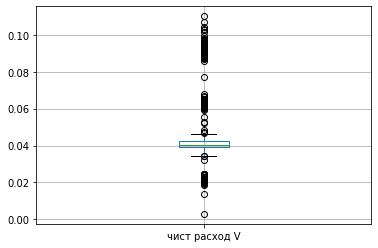

Данные по колонке: температура первая
Заполненны на 91.41%


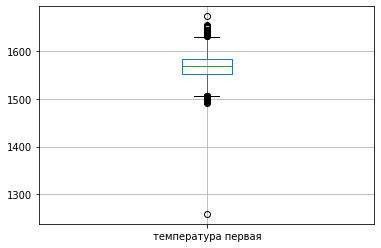

Данные по колонке: температура последняя
Заполненны на 91.41%


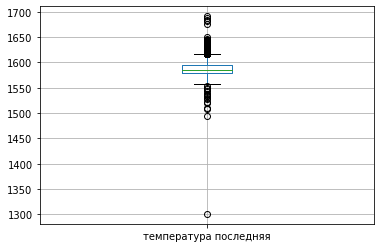

Данные по колонке: Ar (интенс.)
Заполненны на 91.27%


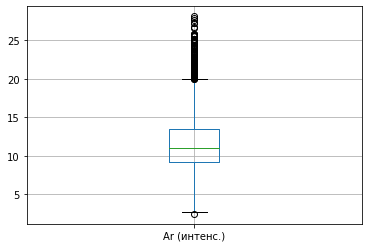

Данные по колонке: N2 (интенс.)
Заполненны на 19.73%


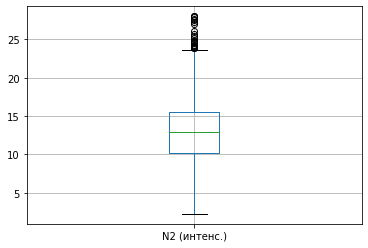

Данные по колонке: эл. энергия (интенс.)
Заполненны на 91.46%


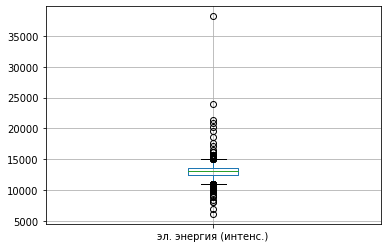

Данные по колонке: произв жидкая сталь
Заполненны на 91.52%


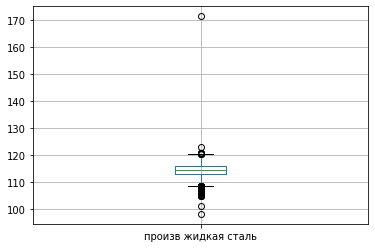

Данные по колонке: произв количество обработок
Заполненны на 91.52%


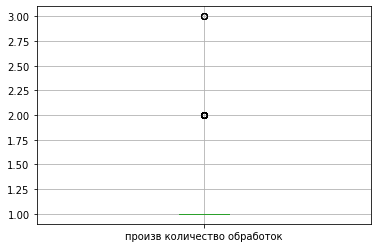

Данные по колонке: произв  количество плавок
Заполненны на 91.52%


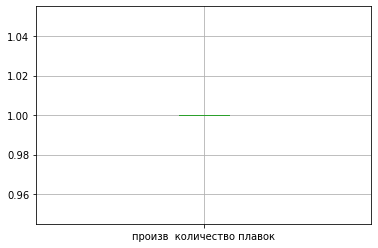

Данные по колонке: произв количество плавок (цел)
Заполненны на 91.52%


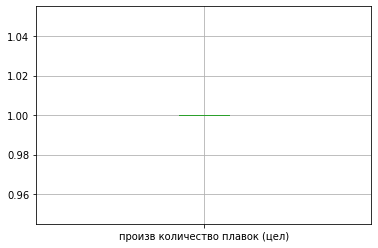

Данные по колонке: расход газ Ar
Заполненны на 91.27%


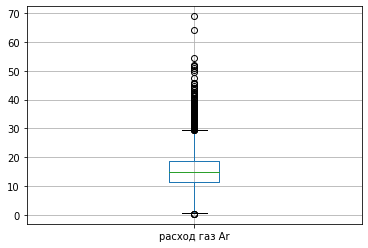

Данные по колонке: расход газ  N2
Заполненны на 19.73%


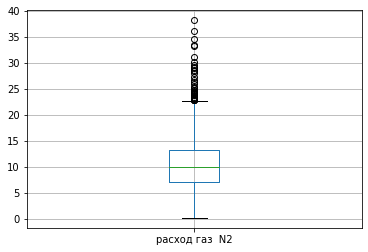

Данные по колонке: расход C пров.
Заполненны на 10.28%


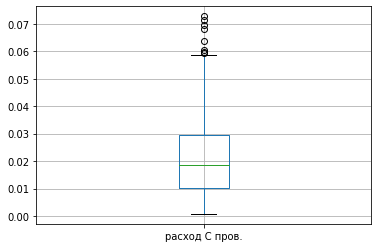

Данные по колонке: сыпуч известь РП
Заполненны на 67.75%


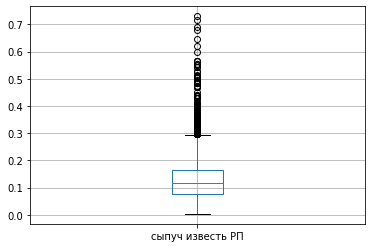

Данные по колонке: сыпуч кварцит
Заполненны на 0.18%


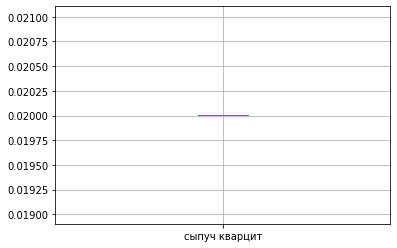

Данные по колонке: сыпуч кокс пыль УСТК
Заполненны на 91.21%


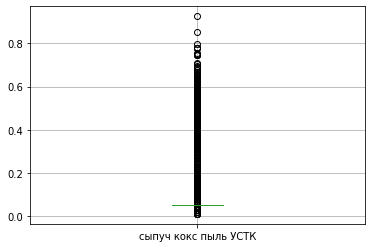

Данные по колонке: сыпуч  кокс. мелочь (сух.)
Заполненны на 0.1%


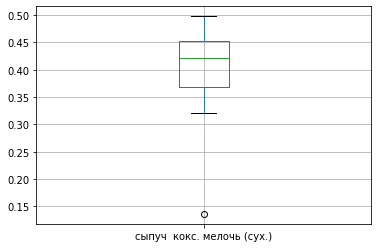

Данные по колонке: сыпуч  кокс. мелочь КМ1
Заполненны на 89.58%


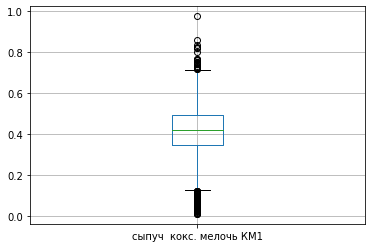

Данные по колонке: сыпуч  шпат плав.
Заполненны на 83.94%


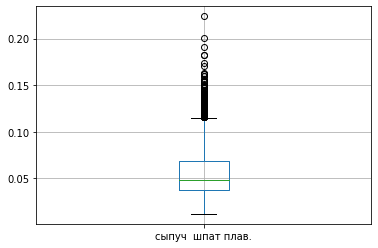

Данные по колонке: ферспл CaC2
Заполненны на 88.68%


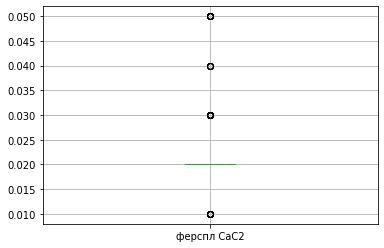

Данные по колонке: ферспл FeMo
Заполненны на 0.47%


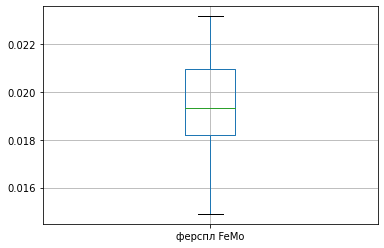

Данные по колонке: ферспл FeSi-75
Заполненны на 0.07%


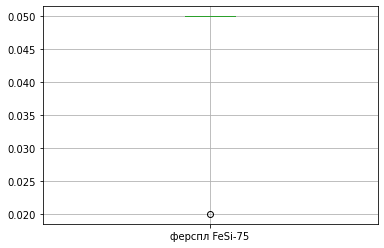

Данные по колонке: ферспл FeV азот.
Заполненны на 5.44%


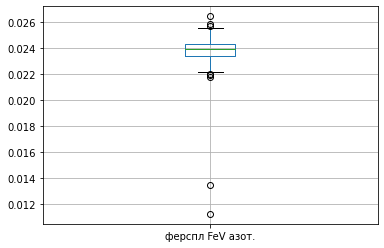

Данные по колонке: ферспл  FeV-80
Заполненны на 87.76%


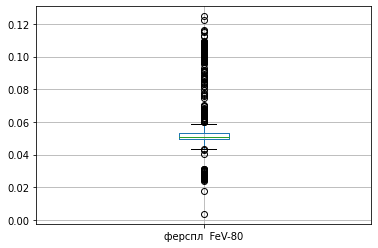

Данные по колонке: ферспл  Mn5Si65Al0.5
Заполненны на 90.9%


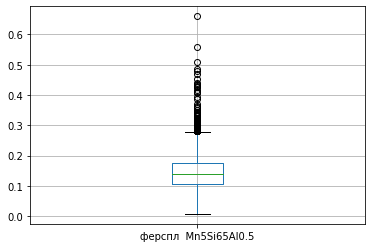

Данные по колонке: ферспл  Ni H1 пласт.
Заполненны на 1.16%


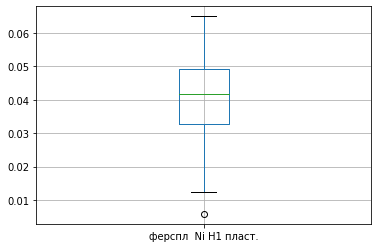

Данные по колонке: ферспл SiMn18
Заполненны на 90.87%


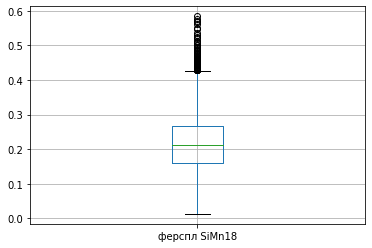

Данные по колонке: ферспл  ферванит
Заполненны на 14.44%


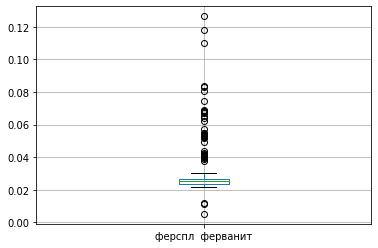

Данные по колонке: ферспл  фх850А
Заполненны на 83.55%


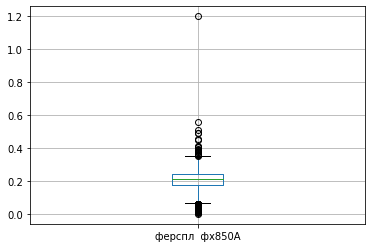

Данные по колонке: эл. энергия
Заполненны на 91.46%


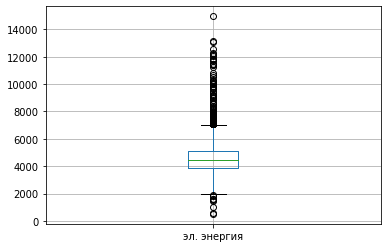

Данные по колонке: химсталь первый Al_1
Заполненны на 91.52%


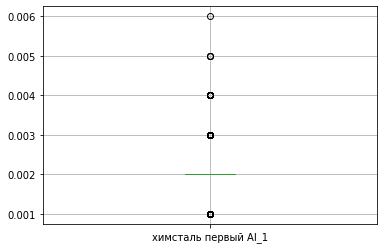

Данные по колонке: химсталь первый C_1
Заполненны на 91.52%


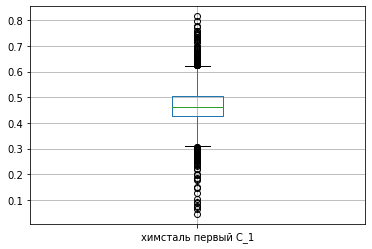

Данные по колонке: химсталь первый Cr_1
Заполненны на 91.52%


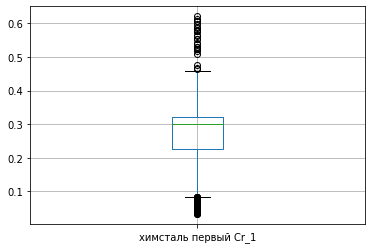

Данные по колонке: химсталь первый Cu_1
Заполненны на 91.52%


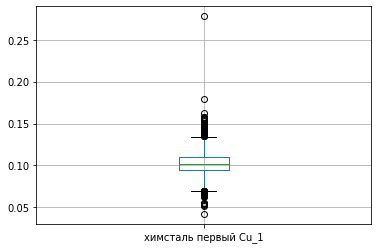

Данные по колонке: химсталь первый Mn_1
Заполненны на 91.52%


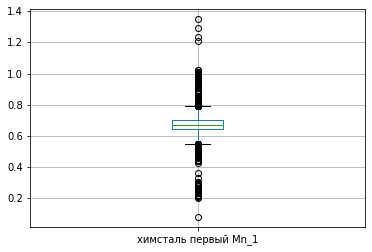

Данные по колонке: химсталь первый Mo_1
Заполненны на 91.51%


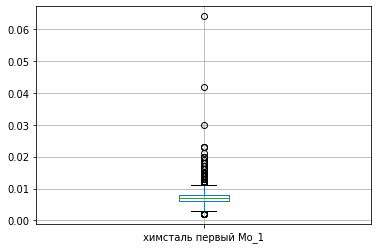

Данные по колонке: химсталь первый N_1
Заполненны на 91.51%


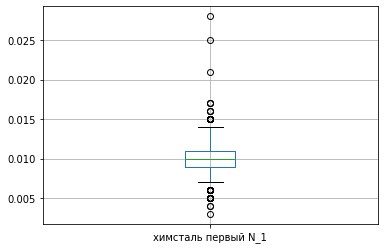

Данные по колонке: химсталь первый Ni_1
Заполненны на 91.52%


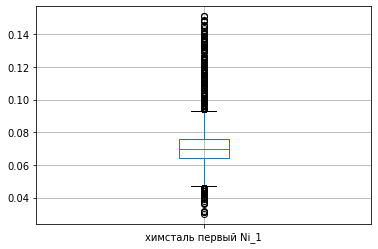

Данные по колонке: химсталь первый P_1
Заполненны на 91.52%


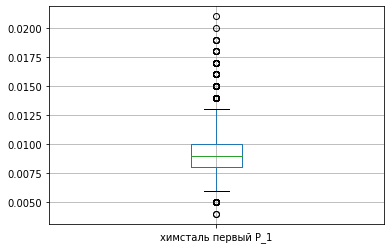

Данные по колонке: химсталь первый S_1
Заполненны на 91.52%


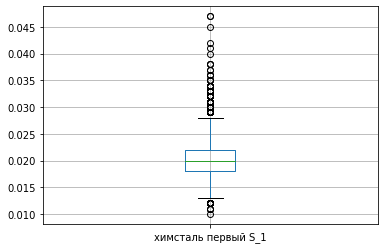

Данные по колонке: химсталь первый Si_1
Заполненны на 91.52%


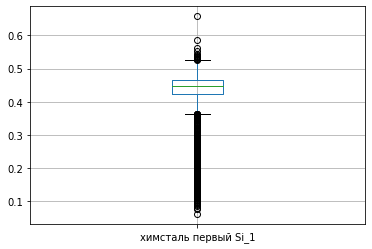

Данные по колонке: химсталь первый Ti_1
Заполненны на 91.52%


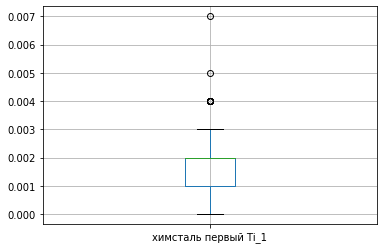

Данные по колонке: химсталь первый V_1
Заполненны на 91.52%


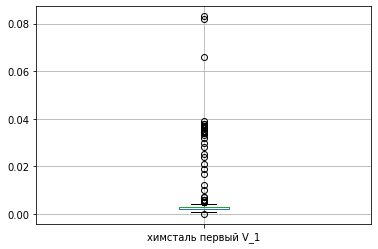

Данные по колонке: химсталь последний Al
Заполненны на 91.52%


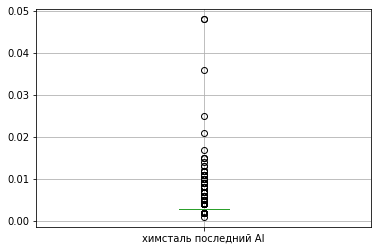

Данные по колонке: химсталь последний C
Заполненны на 91.52%


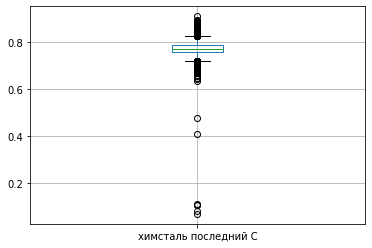

Данные по колонке: химсталь последний Ca
Заполненны на 88.31%


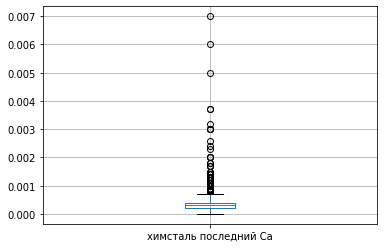

Данные по колонке: химсталь последний Cr
Заполненны на 91.52%


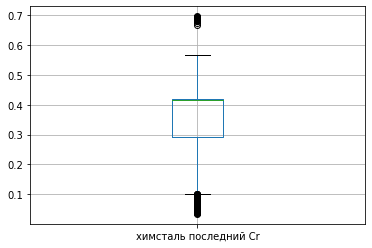

Данные по колонке: химсталь последний Cu
Заполненны на 91.52%


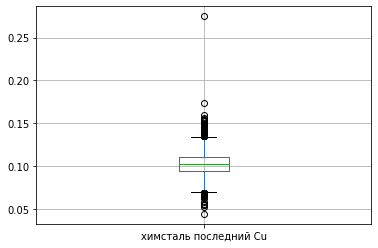

Данные по колонке: химсталь последний Mn
Заполненны на 91.52%


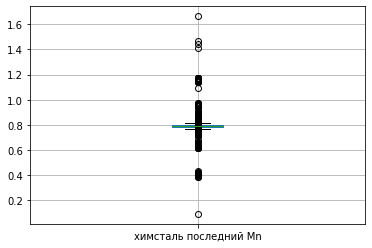

Данные по колонке: химсталь последний Mo
Заполненны на 91.52%


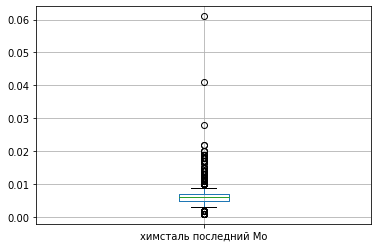

Данные по колонке: химсталь последний N
Заполненны на 91.49%


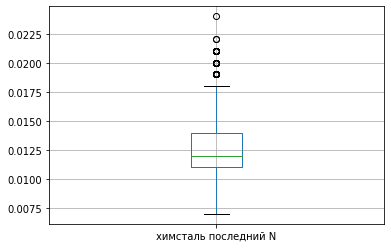

Данные по колонке: химсталь последний Ni
Заполненны на 91.52%


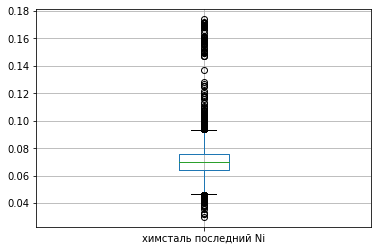

Данные по колонке: химсталь последний P
Заполненны на 91.52%


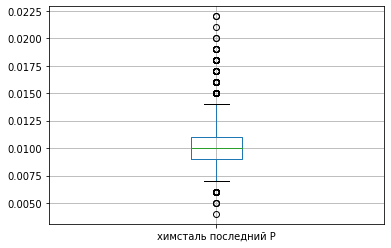

Данные по колонке: химсталь последний S
Заполненны на 91.52%


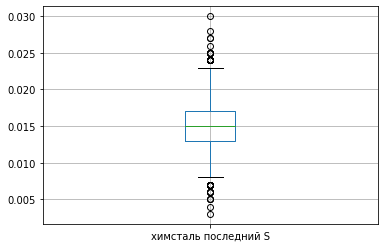

Данные по колонке: химсталь последний Si
Заполненны на 91.52%


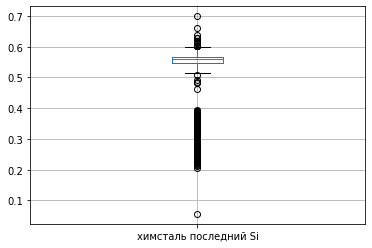

Данные по колонке: химсталь последний Ti
Заполненны на 91.52%


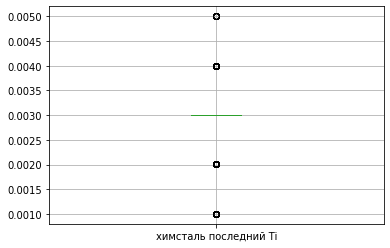

Данные по колонке: химсталь последний V
Заполненны на 91.52%


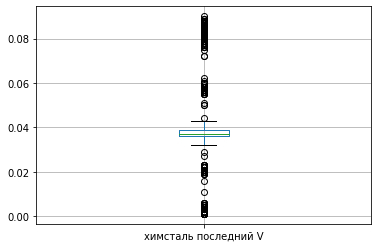

Данные по колонке: химшлак первый Al2O3_1
Заполненны на 67.35%


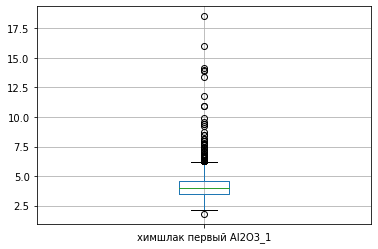

Данные по колонке: химшлак первый CaO_1
Заполненны на 91.52%


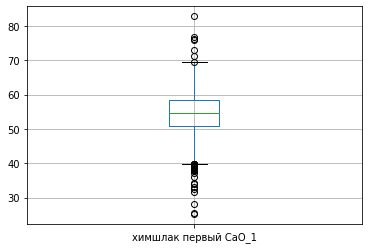

Данные по колонке: химшлак первый FeO_1
Заполненны на 91.52%


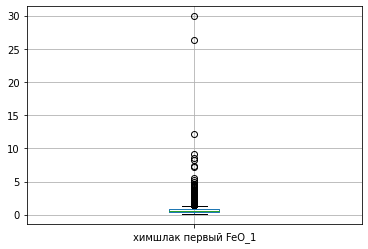

Данные по колонке: химшлак первый MgO_1
Заполненны на 91.51%


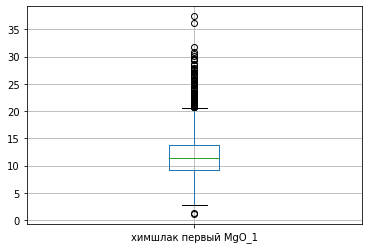

Данные по колонке: химшлак первый MnO_1
Заполненны на 91.52%


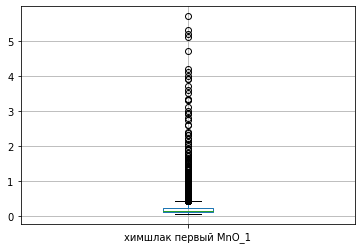

Данные по колонке: химшлак первый R_1
Заполненны на 91.52%


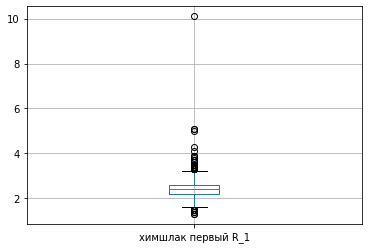

Данные по колонке: химшлак первый SiO2_1
Заполненны на 67.35%


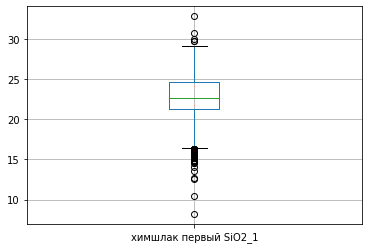

Данные по колонке: химшлак последний Al2O3
Заполненны на 67.35%


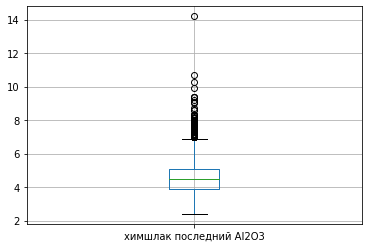

Данные по колонке: химшлак последний CaO
Заполненны на 91.52%


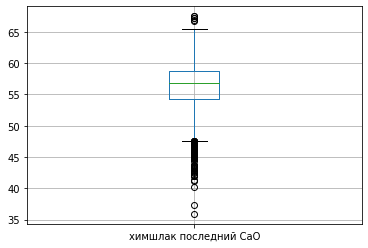

Данные по колонке: химшлак последний FeO
Заполненны на 91.52%


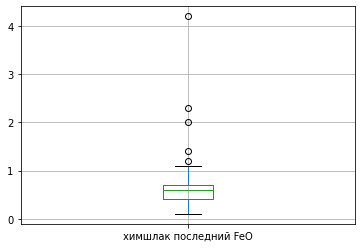

Данные по колонке: химшлак последний MgO
Заполненны на 91.51%


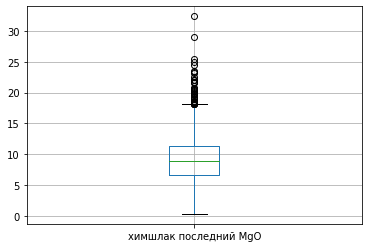

Данные по колонке: химшлак последний MnO
Заполненны на 91.52%


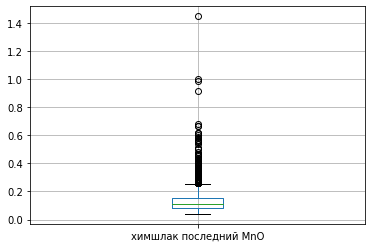

Данные по колонке: химшлак последний R
Заполненны на 91.52%


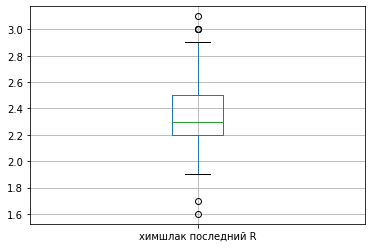

Данные по колонке: химшлак последний SiO2
Заполненны на 67.35%


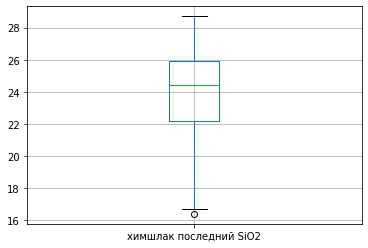

In [96]:
for colnam in columns_float:
    plt.figure()
    is_nan = df_disp[colnam].isna().value_counts()
    plt_zap = round(is_nan[False] / df_disp.shape[0]*100, 2)
    print(f"Данные по колонке: {colnam}\nЗаполненны на {plt_zap}%")
    df_disp[colnam].plot.box(grid = True)
    plt.show()

In [97]:
df_disp[columns_float].describe().transpose().sort_values('50%')

,count,mean,std,min,25%,50%,75%,max
химсталь последний Ca,6218.0,0.000319,0.000244,0.000000,0.000200,0.000300,0.000400,0.007000
химсталь первый Al_1,6444.0,0.001783,0.000488,0.001000,0.002001,0.002001,0.002001,0.006001
химсталь первый Ti_1,6444.0,0.001662,0.000546,0.000000,0.001000,0.002001,0.002001,0.007000
химсталь последний Al,6444.0,0.003181,0.001315,0.001000,0.003000,0.003000,0.003000,0.048004
химсталь первый V_1,6444.0,0.002771,0.002794,0.000000,0.002001,0.003000,0.003000,0.083008
химсталь последний Ti,6444.0,0.002903,0.000546,0.001000,0.003000,0.003000,0.003000,0.005001
химсталь последний Mo,6444.0,0.006256,0.002316,0.001000,0.005001,0.006001,0.007000,0.061005
химсталь первый Mo_1,6443.0,0.007050,0.002100,0.002001,0.006001,0.007000,0.008003,0.064026
химсталь первый P_1,6444.0,0.009109,0.002043,0.004002,0.008003,0.009003,0.010002,0.020996
химсталь первый N_1,6443.0,0.009972,0.001505,0.003000,0.009003,0.010002,0.011002,0.028000


In [98]:
# df_disp[columns_float].describe().transpose().sort_values('50%')[['mean',
#                                                                   'std',
#                                                                   'min',
#                                                                   '25%',
#                                                                   '50%',
#                                                                   '75%',
#                                                                   'max']].plot.barh(figsize=(6, 50))

<AxesSubplot:>

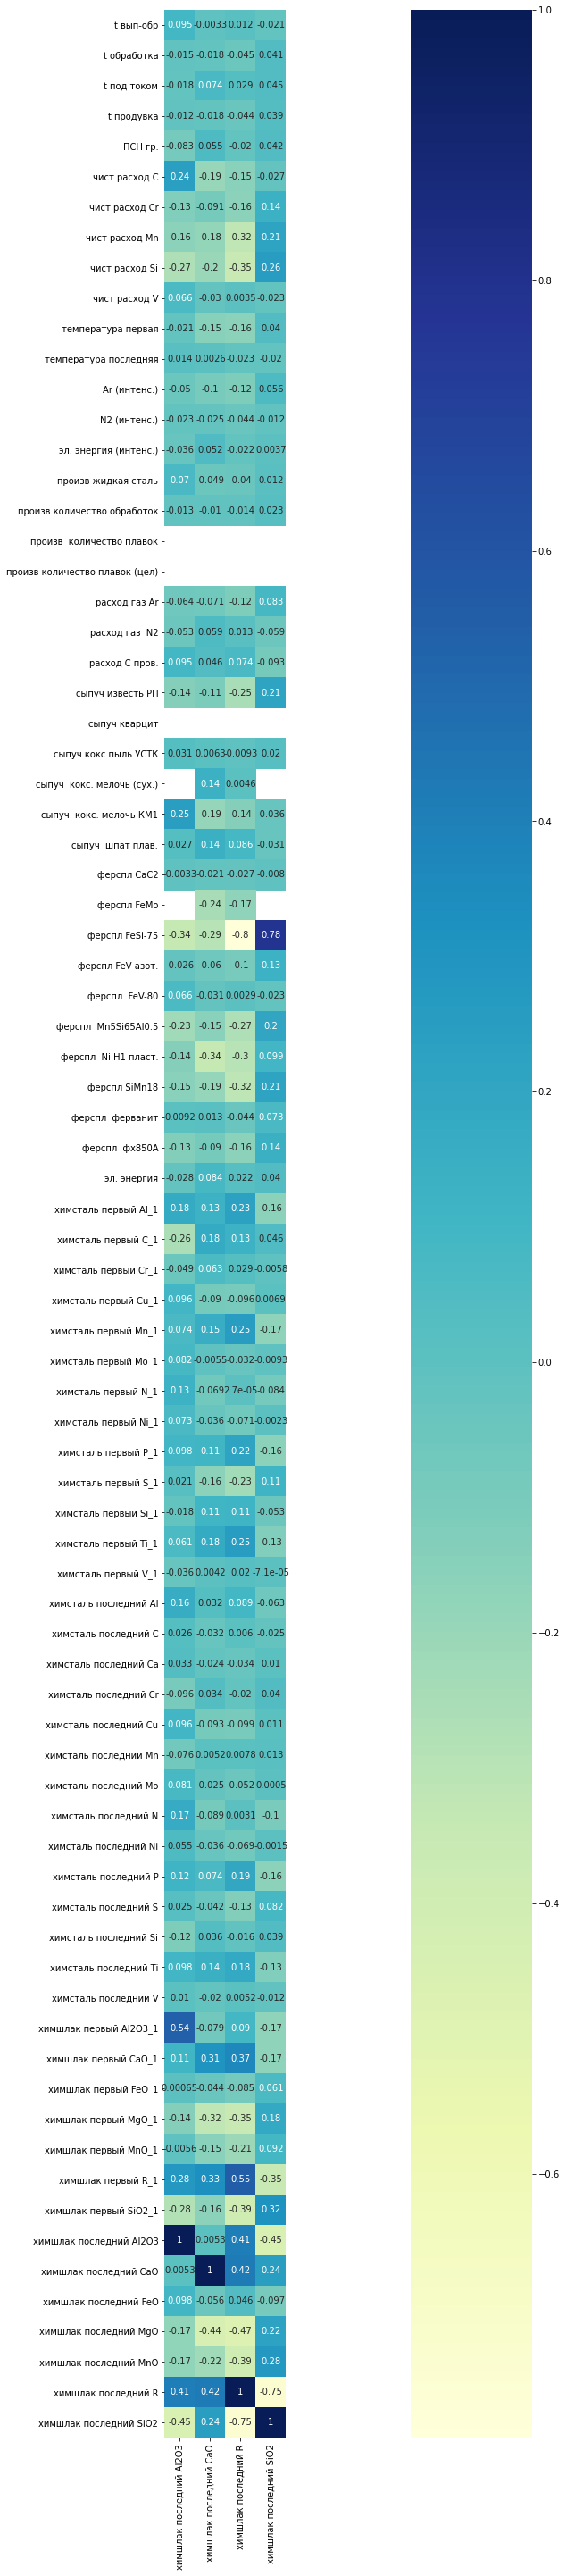

In [99]:
#Простое изучение зависимости целевых данных отностельно остальных
corrmat = df_disp[columns_float].corr()
f, ax = plt.subplots(figsize=(50, 50))
sns.heatmap(corrmat[['химшлак последний Al2O3', 
          'химшлак последний CaO',
          'химшлак последний R',
          'химшлак последний SiO2']], 
            annot=True,
            square=True,
            cmap= 'YlGnBu')

## Predict

In [100]:
df = df_in[df_in.МАРКА == 'Э76ХФ']
df.head()

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),N2 (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,расход газ N2,расход C пров.,сыпуч известь РП,сыпуч кварцит,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь (сух.),сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeMo,ферспл FeSi-75,ферспл FeV азот.,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл Ni H1 пласт.,ферспл SiMn18,ферспл ферванит,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,г6837?3<87?,2070-06-21 00:14:00,Э76ХФ,Р65,29.0,45.37500,24.406250,41.03125,NaN,0.456543,0.059570,0.117432,0.104736,0.040924,1557.0,1580.0,13.609375,NaN,12808.0,115.5000,1.0,1.0,1.0,18.609375,NaN,NaN,NaN,NaN,0.170044,NaN,0.400879,0.122986,0.020004,NaN,NaN,NaN,0.051941,0.112000,NaN,0.182007,NaN,0.106018,5208.0,0.002001,0.388916,0.367920,0.126953,0.682129,0.010002,0.011002,0.085999,0.009003,0.022995,0.458984,0.002001,0.002001,0.003000,0.755859,0.0001,0.416992,0.125977,0.778809,0.009003,0.012001,0.085999,0.011002,0.018005,0.559082,0.003,0.036987,NaN,63.68750,1.099609,3.699219,0.119995,2.599609,NaN,NaN,53.40625,1.000000,5.800781,0.150024,2.599609,NaN
1,г683863<886,2070-06-21 01:07:00,Э76ХФ,Р65,26.0,44.06250,13.867188,44.06250,NaN,0.359375,0.083740,0.160889,0.110352,0.040070,1601.0,1591.0,8.078125,NaN,12816.0,111.6250,1.0,1.0,1.0,11.656250,NaN,NaN,NaN,NaN,0.488037,NaN,NaN,0.093994,0.020004,NaN,NaN,NaN,0.050842,0.101990,NaN,0.250977,NaN,0.149048,2962.0,0.002001,0.465088,0.344971,0.112000,0.643066,0.009003,0.011002,0.080017,0.007000,0.022995,0.460938,0.002001,0.002001,0.003000,0.773926,0.0003,0.416016,0.109009,0.767090,0.008003,0.013000,0.078979,0.008003,0.020996,0.542969,0.003,0.037994,NaN,58.50000,0.799805,4.898438,0.140015,2.199219,NaN,NaN,59.31250,0.600098,4.101562,0.109985,2.300781,NaN
2,г683863<887,2070-06-21 02:00:00,Э76ХФ,Р65,24.0,43.34375,17.953125,43.34375,NaN,0.331543,0.081482,0.132324,0.139893,0.041626,1593.0,1586.0,13.804688,NaN,12512.0,115.8125,1.0,1.0,1.0,19.875000,NaN,NaN,NaN,NaN,0.049988,NaN,0.345947,0.061005,0.020004,NaN,NaN,NaN,0.052795,0.160034,NaN,0.203979,NaN,0.145020,3744.0,0.002001,0.513184,0.351074,0.106995,0.673828,0.007000,0.011002,0.078003,0.008003,0.018997,0.455078,0.002001,0.002001,0.004002,0.770020,0.0009,0.416992,0.107971,0.788086,0.006001,0.012001,0.078003,0.008003,0.013000,0.567871,0.003,0.037994,NaN,58.00000,0.799805,8.601562,0.119995,2.599609,NaN,NaN,57.18750,0.500000,8.101562,0.130005,2.300781,NaN
3,г683863<888,2070-06-21 02:58:00,Э76ХФ,Р65,17.0,46.18750,19.812500,46.18750,NaN,0.377930,0.133179,0.221558,0.165161,0.042053,1589.0,1589.0,12.664062,NaN,13000.0,116.3125,1.0,1.0,1.0,19.500000,NaN,NaN,0.077026,NaN,0.049988,NaN,0.389893,0.058990,0.020004,NaN,NaN,NaN,0.053345,0.161011,NaN,0.344971,NaN,0.237061,4292.0,0.002001,0.487061,0.310059,0.104980,0.610840,0.009003,0.011002,0.070007,0.006001,0.020004,0.434082,0.001000,0.001000,0.003000,0.767090,0.0002,0.418945,0.103027,0.794922,0.008003,

In [168]:
# drop null
# Фильтруем данные в которых встречаются пропуски в одном из целевых столбцов
X_columns = [column for column in df.columns if re.search('чист расход', 
                                                                  column.lower())]
y_columns = ['химшлак последний Al2O3', 
          'химшлак последний CaO',
          'химшлак последний R',
          'химшлак последний SiO2']

In [169]:
df = df[df.МАРКА == 'Э76ХФ']
df.head()

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),N2 (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,расход газ N2,расход C пров.,сыпуч известь РП,сыпуч кварцит,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь (сух.),сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeMo,ферспл FeSi-75,ферспл FeV азот.,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл Ni H1 пласт.,ферспл SiMn18,ферспл ферванит,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,г6837?3<87?,2070-06-21 00:14:00,Э76ХФ,Р65,29.0,45.37500,24.406250,41.03125,NaN,0.456543,0.059570,0.117432,0.104736,0.040924,1557.0,1580.0,13.609375,NaN,12808.0,115.5000,1.0,1.0,1.0,18.609375,NaN,NaN,NaN,NaN,0.170044,NaN,0.400879,0.122986,0.020004,NaN,NaN,NaN,0.051941,0.112000,NaN,0.182007,NaN,0.106018,5208.0,0.002001,0.388916,0.367920,0.126953,0.682129,0.010002,0.011002,0.085999,0.009003,0.022995,0.458984,0.002001,0.002001,0.003000,0.755859,0.0001,0.416992,0.125977,0.778809,0.009003,0.012001,0.085999,0.011002,0.018005,0.559082,0.003,0.036987,NaN,63.68750,1.099609,3.699219,0.119995,2.599609,NaN,NaN,53.40625,1.000000,5.800781,0.150024,2.599609,NaN
1,г683863<886,2070-06-21 01:07:00,Э76ХФ,Р65,26.0,44.06250,13.867188,44.06250,NaN,0.359375,0.083740,0.160889,0.110352,0.040070,1601.0,1591.0,8.078125,NaN,12816.0,111.6250,1.0,1.0,1.0,11.656250,NaN,NaN,NaN,NaN,0.488037,NaN,NaN,0.093994,0.020004,NaN,NaN,NaN,0.050842,0.101990,NaN,0.250977,NaN,0.149048,2962.0,0.002001,0.465088,0.344971,0.112000,0.643066,0.009003,0.011002,0.080017,0.007000,0.022995,0.460938,0.002001,0.002001,0.003000,0.773926,0.0003,0.416016,0.109009,0.767090,0.008003,0.013000,0.078979,0.008003,0.020996,0.542969,0.003,0.037994,NaN,58.50000,0.799805,4.898438,0.140015,2.199219,NaN,NaN,59.31250,0.600098,4.101562,0.109985,2.300781,NaN
2,г683863<887,2070-06-21 02:00:00,Э76ХФ,Р65,24.0,43.34375,17.953125,43.34375,NaN,0.331543,0.081482,0.132324,0.139893,0.041626,1593.0,1586.0,13.804688,NaN,12512.0,115.8125,1.0,1.0,1.0,19.875000,NaN,NaN,NaN,NaN,0.049988,NaN,0.345947,0.061005,0.020004,NaN,NaN,NaN,0.052795,0.160034,NaN,0.203979,NaN,0.145020,3744.0,0.002001,0.513184,0.351074,0.106995,0.673828,0.007000,0.011002,0.078003,0.008003,0.018997,0.455078,0.002001,0.002001,0.004002,0.770020,0.0009,0.416992,0.107971,0.788086,0.006001,0.012001,0.078003,0.008003,0.013000,0.567871,0.003,0.037994,NaN,58.00000,0.799805,8.601562,0.119995,2.599609,NaN,NaN,57.18750,0.500000,8.101562,0.130005,2.300781,NaN
3,г683863<888,2070-06-21 02:58:00,Э76ХФ,Р65,17.0,46.18750,19.812500,46.18750,NaN,0.377930,0.133179,0.221558,0.165161,0.042053,1589.0,1589.0,12.664062,NaN,13000.0,116.3125,1.0,1.0,1.0,19.500000,NaN,NaN,0.077026,NaN,0.049988,NaN,0.389893,0.058990,0.020004,NaN,NaN,NaN,0.053345,0.161011,NaN,0.344971,NaN,0.237061,4292.0,0.002001,0.487061,0.310059,0.104980,0.610840,0.009003,0.011002,0.070007,0.006001,0.020004,0.434082,0.001000,0.001000,0.003000,0.767090,0.0002,0.418945,0.103027,0.794922,0.008003,

In [206]:
X = df.fillna(0).loc[, X_columns]
y = df.fillna(0).loc[, y_columns]

In [209]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4432 entries, 0 to 7026
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   химшлак последний Al2O3  4432 non-null   float16
 1   химшлак последний CaO    4432 non-null   float16
 2   химшлак последний R      4432 non-null   float16
 3   химшлак последний SiO2   4432 non-null   float16
dtypes: float16(4)
memory usage: 69.2 KB


In [210]:
from sklearn.linear_model import LinearRegression

In [211]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.13053558896952272

In [229]:
test_df = df[:4]
test_X = test_df.fillna(0).loc[: , X_columns]
test_y = test_df.fillna(0).loc[: , y_columns]

In [238]:
pred = reg.predict(np.array(test_X))
y_pred_columns = ['Pred_' + col for col in y_columns]
test_df.loc[:, y_pred_columns] = pred
test_df[y_pred_columns + y_columns]

c:\users\uriks\programming\virtualenv\data_science\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Pred_химшлак последний Al2O3,Pred_химшлак последний CaO,Pred_химшлак последний R,Pred_химшлак последний SiO2,химшлак последний Al2O3,химшлак последний CaO,химшлак последний R,химшлак последний SiO2
0,1.439549,56.766342,2.379809,4.618090,NaN,53.40625,2.599609,NaN
1,2.015568,57.042416,2.340957,10.863024,NaN,59.31250,2.300781,NaN
2,2.303035,57.011639,2.335505,13.585638,NaN,57.18750,2.300781,NaN
3,2.410196,56.079639,2.235520,15.640282,NaN,60.31250,2.599609,NaN
